<a href="https://colab.research.google.com/github/drewkostelecky/lab-3-drewkostelecky/blob/main/DATA_301_Lab_3_Drew_Kostelecky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [1]:
# READ IN THE DATA SET HERE
import pandas as pd
import matplotlib.pyplot as plt

df_replication = pd.read_csv("https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv")
df_replication.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

0.6903846153846154
0.5764705882352942


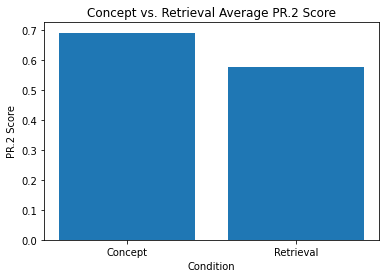

In [2]:
# YOUR CODE HERE
grouped = df_replication.groupby("Condition").mean()
concept = grouped.loc["Concept", "PR.2"]
retrieval = grouped.loc["Retrieval", "PR.2"]
print(concept.mean())
print(retrieval.mean())

plt.bar(["Concept", "Retrieval"], [concept, retrieval])
plt.xlabel("Condition")
plt.ylabel("PR.2 Score")
plt.title("Concept vs. Retrieval Average PR.2 Score")
plt.show()

**YOUR EXPLANATION HERE**

The Concept group felt like they learned more and were going to do better on the test. They predicted they would score around .69 where the Retrival group predicted around .57 on average.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

0.4688461538461538
0.6164705882352941


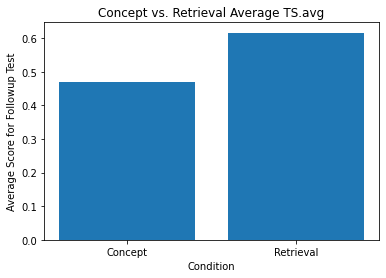

In [3]:
# YOUR CODE HERE
grouped = df_replication.groupby("Condition").mean()
concept = grouped.loc["Concept", "TS.avg"]
retrieval = grouped.loc["Retrieval", "TS.avg"]
print(concept.mean())
print(retrieval.mean())

plt.bar(["Concept", "Retrieval"], [concept, retrieval])
plt.xlabel("Condition")
plt.ylabel("Average Score for Followup Test")
plt.title("Concept vs. Retrieval Average TS.avg")
plt.show()

**YOUR EXPLANATION HERE**

The codebook shows that TS.avg is the average score of TS1 and TS2 or ((TS1+TS2)/2). Because these are the two score that make up the total score for the follow up assessment, we want ot track these amoung the two conditions. When looking at Concept group, they have a TS.avg of 0.47 which is worse than the Retrieval average score of 0.62

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

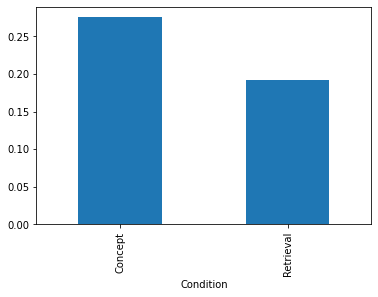

In [4]:
# YOUR CODE HERE
df_replication["PR_Accuracy"] = (df_replication["TS.avg"] - df_replication["PR.2"]).abs()
df_replication.groupby("Condition")["PR_Accuracy"].mean().plot.bar()

In [5]:
df_replication["Prediction Accuracy"] = df_replication["TS.avg"] - df_replication["PR.2"]
df_replication[["TS.avg","PR.2","Prediction Accuracy"]]

grouped = df_replication.groupby("Condition").mean()
concept = grouped.loc["Concept", "Prediction Accuracy"]
retrieval = grouped.loc["Retrieval", "Prediction Accuracy"]
print("Prediction Accuracy Concept Average", concept.mean())
print("Prediction Accuracy Retrieval Average", retrieval.mean())
print("Prediction Accuracy Total Average", df_replication["Prediction Accuracy"].mean())

Prediction Accuracy Concept Average -0.22153846153846152
Prediction Accuracy Retrieval Average 0.04000000000000001
Prediction Accuracy Total Average -0.11813953488372093


**YOUR EXPLANATION HERE**

The Retrival group was much better at predicting their performance on the follow up test. On average, the Concept group was off by about 0.27 and the Retrival group was off by about 0.19.

The TS.avg gives us the total score for the second test and the PR.2 is the subjects guess of their score for their future follow up test. I created a new column called prediction accuracy that takes their TS.avg score - PR.2. This means if they will have a positive value of the percentage points they beat their prediction by, and a negative value if they did worse than their prediciton. The concept group average was -22.15 points and the average retrieval average was +0.04 points. This means that the concept group scored much lower than they had predicted and the retrival group actually scored slightly higher than they predicted.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.